## ***13.XGBM AND LGBM***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#### 1]EDA

In [ ]:
diab=pd.read_csv('diabetes.csv')

In [ ]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diab.shape

(768, 9)

In [ ]:
diab.isna().sum()
#checking for null values- there are no null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diab.duplicated().sum()
#checking for duplicates

np.int64(0)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

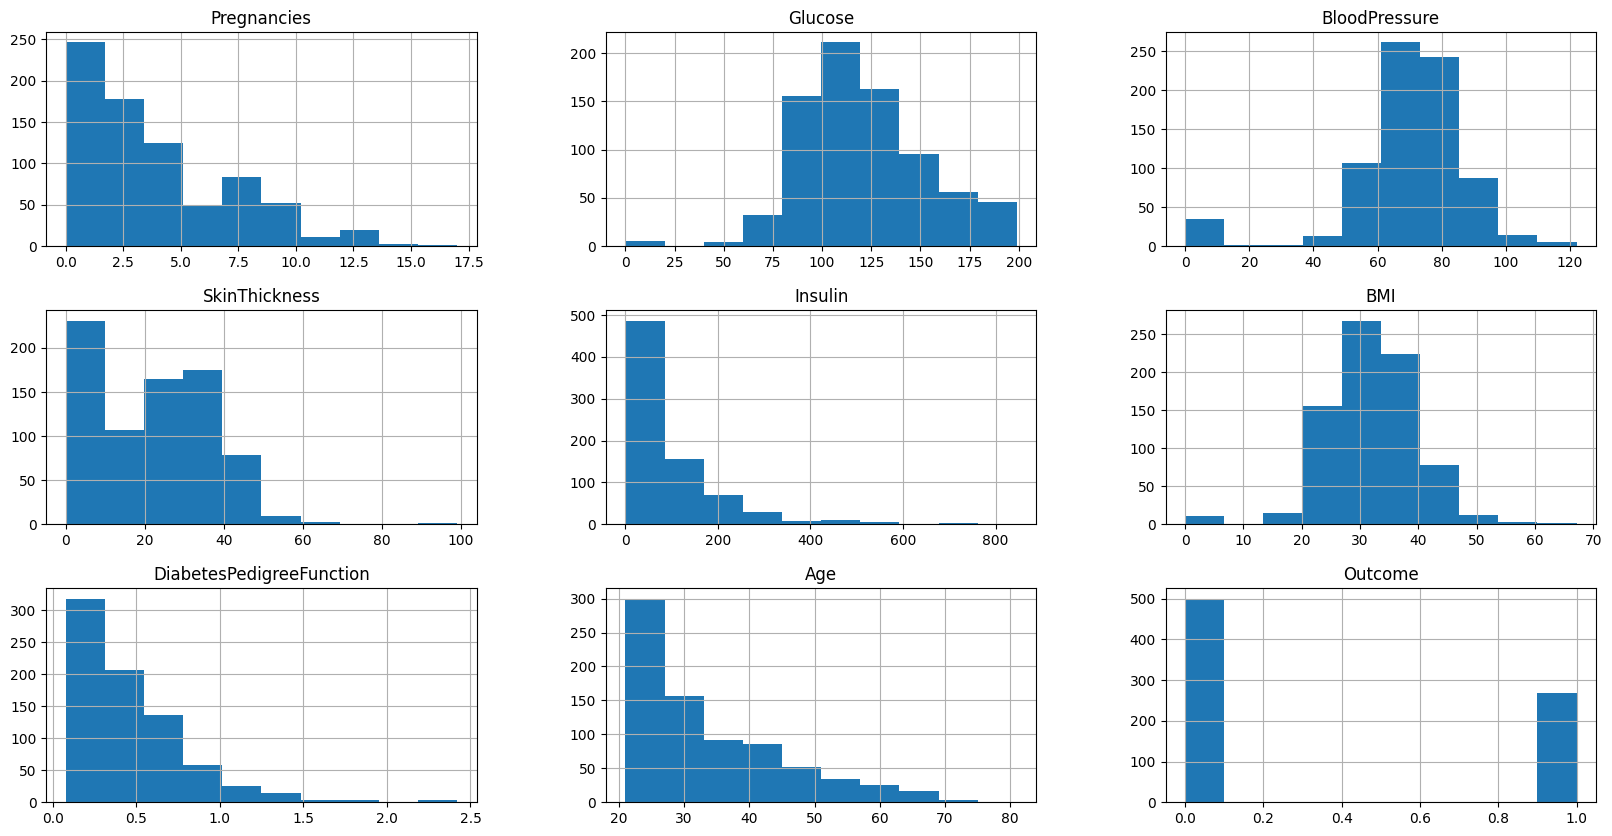

In [ ]:
diab.hist(figsize=(20,10))

In [ ]:
#from hist plot we can see the distribution of continuity. Here we see that there are highest obsservation for 0 in pregnancy
#Similarly we see for age group highest population in age group of 20-25. And outcome is shown in 1 and 0 where
#zero's value_counts are greater

#### 2] Data Preprocessing

In [ ]:
diab.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
#there are no categorical columns hence no need to encode

In [ ]:
diab['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
y=diab[['Outcome']]
features=diab.drop(columns=['Outcome'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

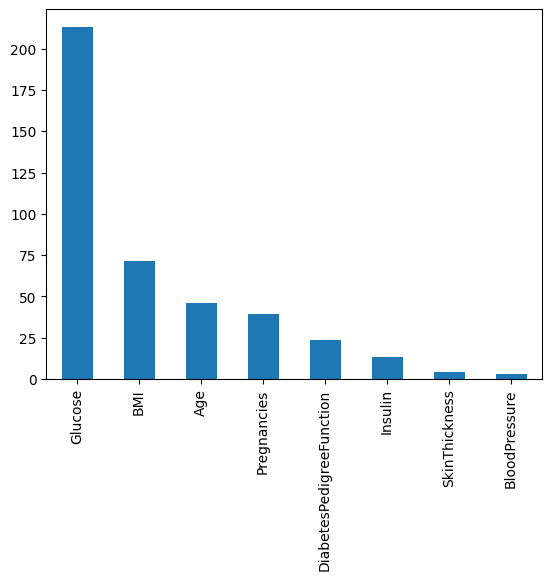

In [ ]:
#feature selection using F_class as feature has discrete and continuous
from sklearn.feature_selection import f_classif
f=f_classif(features,target)
pd.Series(f[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')


In [ ]:
features.drop(columns=['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'])

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

x=pd.DataFrame(std.fit_transform(features),columns=features.columns)

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#### 3]Building Predictive Models

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.44%


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb # Added this import statement
#hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    verbose=0
)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # Corrected import for cross_val_score

grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
tuned_xgb_pred = best_xgb_model.predict(X_test)

tuned_xgb_accuracy = accuracy_score(y_test, tuned_xgb_pred)

xgb_cv_scores = cross_val_score(best_xgb_model, x, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy Scores: {xgb_cv_scores}")
print(f"Mean Cross-validation Accuracy: {xgb_cv_scores.mean():.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:46] WARNING: /w

Cross-validation Accuracy Scores: [0.74025974 0.74675325 0.74675325 0.80392157 0.73856209]
Mean Cross-validation Accuracy: 0.7552


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tuned_xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       162
           1       0.66      0.66      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



In [ ]:
#LGBM
import lightgbm as lgb
d_train=lgb.Dataset(X_train,label=y_train)

In [ ]:
# Set some fixed parameters and others for tuning
lgb_estimator = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    boosting_type='gbdt',
    random_state=42,
    verbose=-1 # Suppress LightGBM internal messages during search
)

In [ ]:
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200], # Number of boosting iterations (trees)
    'num_leaves': [15, 31, 63], # Key parameter for tree complexity
    'max_depth': [-1, 3, 5], # -1 means no limit, often a good starting point for LightGBM

    'subsample': [0.8, 1.0] # Data selection ratio (bagging)
}

In [ ]:
grid_search_lgbm = GridSearchCV(
    estimator=lgb_estimator,
    param_grid=param_grid_lgbm,
    scoring='accuracy', # Or 'roc_auc' for the AUC metric
    cv=5, # 5-fold cross-validation
    verbose=1,
    n_jobs=-1 # Use all available cores for parallel processing
)

In [ ]:
grid_search_lgbm.fit(X_train, y_train)
import warnings
warnings.filterwarnings('ignore')

# 5. Print the best parameters and best score found
print(f"Best parameters found: {grid_search_lgbm.best_params_}")
print(f"Best cross-validation accuracy score: {grid_search_lgbm.best_score_:.4f}")

# 6. Evaluate the best model on the test set
best_lgbm_model = grid_search_lgbm.best_estimator_
y_pred1 = best_lgbm_model.predict(X_test)
y_pred1

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 15, 'subsample': 0.8}
Best cross-validation accuracy score: 0.7743


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       162
           1       0.67      0.55      0.61        92

    accuracy                           0.74       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.73      0.74      0.73       254



#### 4]Comparative Analysis

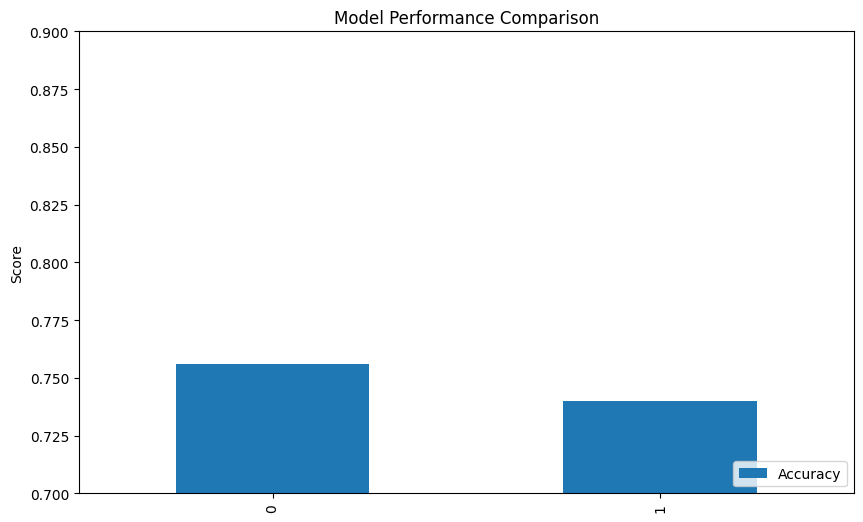

In [ ]:
# Assuming tuned_xgb_accuracy and tuned_lgbm_accuracy are defined from previous cells
# If tuned_lgbm_accuracy is not explicitly stored, calculate it from y_test and y_pred1
from sklearn.metrics import accuracy_score


tuned_lgbm_accuracy = accuracy_score(y_test, y_pred1)

results = {
    'Model': ['XGBoost', 'LightGBM'],
    'Accuracy': [tuned_xgb_accuracy, tuned_lgbm_accuracy]
}
results_df = pd.DataFrame(results)

results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.7, 0.9)
plt.legend(loc='lower right')
plt.show()

In [ ]:
'''
XGBoost (Accuracy: 0.7559): The blue bar shows that the XGBoost model achieved an accuracy
 of approximately 75.59%.
LightGBM (Accuracy: 0.7402): The orange bar indicates that the LightGBM model achieved
an accuracy of approximately 74.02%.
From the plot, we can clearly see that XGBoost performed slightly better
 than LightGBM in terms of accuracy on this dataset. Both models show
 comparable performance, with XGBoost having a marginal edge.
 '''


'\nXGBoost (Accuracy: 0.7559): The blue bar shows that the XGBoost model achieved an accuracy\n of approximately 75.59%.\nLightGBM (Accuracy: 0.7402): The orange bar indicates that the LightGBM model achieved \nan accuracy of approximately 74.02%.\nFrom the plot, you can clearly see that XGBoost performed slightly better\n than LightGBM in terms of accuracy on this dataset. Both models show \n comparable performance, with XGBoost having a marginal edge.\n '